In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load SVHN dataset
train_data, test_data = tfds.load('svhn_cropped', split=['train', 'test'], as_supervised=True)

# Get information about the dataset
num_classes = 10  # SVHN has 10 classes representing digits 0-9
num_train_examples = tf.data.experimental.cardinality(train_data).numpy()
num_test_examples = tf.data.experimental.cardinality(test_data).numpy()

In [3]:
print("Number of classes:", num_classes)
print("Number of training examples:", num_train_examples)
print("Number of test examples:", num_test_examples)

Number of classes: 10
Number of training examples: 73257
Number of test examples: 26032


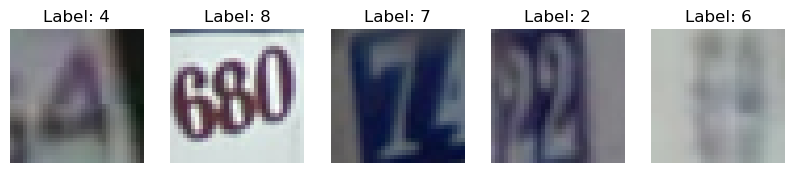

In [4]:
# Display sample images
plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(train_data.take(5)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
plt.show()

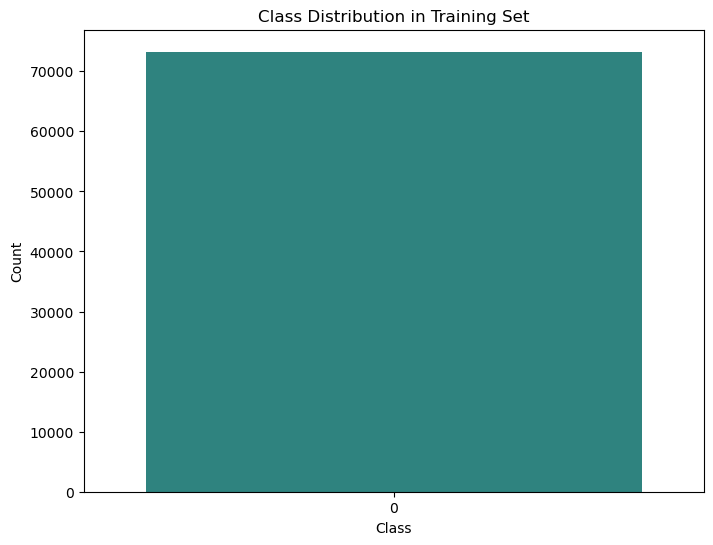

In [5]:
train_labels = np.array([label.numpy() for _, label in train_data])

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(train_labels, palette='viridis')
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [6]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Preprocess the data
train_images = np.array([image.numpy() for image, _ in train_data])
test_images = np.array([image.numpy() for image, _ in test_data])


In [7]:
# Reshape the images to 1D arrays
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)


In [8]:
# Perform PCA
pca = PCA(n_components=50)  # You can adjust the number of components as needed
train_images_pca = pca.fit_transform(train_images_flat)
test_images_pca = pca.transform(test_images_flat)



In [9]:
# Extract test labels
test_labels = np.array([label.numpy() for _, label in test_data])

In [10]:
# Train a classifier (Random Forest as an example)
classifier = RandomForestClassifier()
classifier.fit(train_images_pca, train_labels)


RandomForestClassifier()

In [11]:
# Evaluate the classifier
test_labels_pred = classifier.predict(test_images_pca)

In [12]:
# Calculate accuracy
accuracy = accuracy_score(test_labels, test_labels_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5957667486170867


In [14]:
# Calculate confusion matrix
cm = confusion_matrix(test_labels, test_labels_pred)

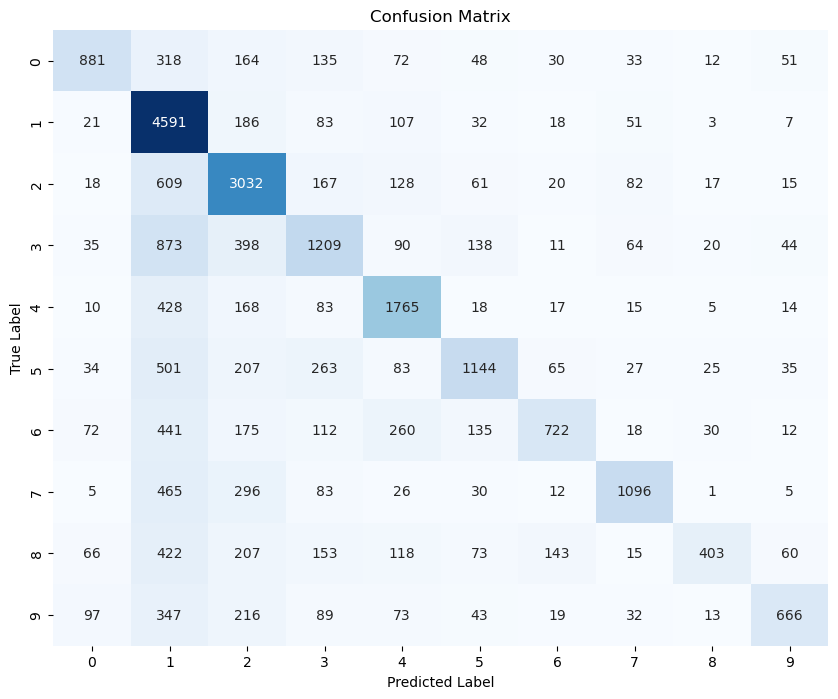

In [15]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()